In [27]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVR


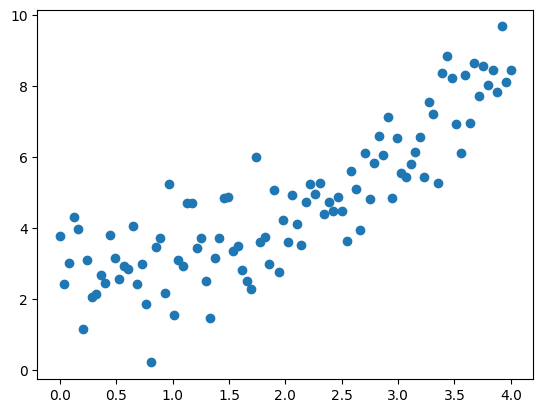

In [28]:
np.random.seed(0)

m = 100
X = np.linspace(0, 4, m).reshape(m, 1)
y = 2 + X**1.3 + np.random.randn(m, 1)
y = y.ravel()

plt.scatter(X, y)
plt.show()


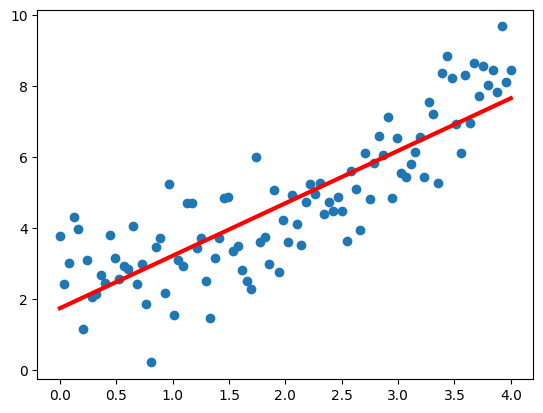

In [29]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red', lw="3")
plt.show()

In [30]:
metrics.mean_absolute_error(y, y_pred)

0.8739397321740953

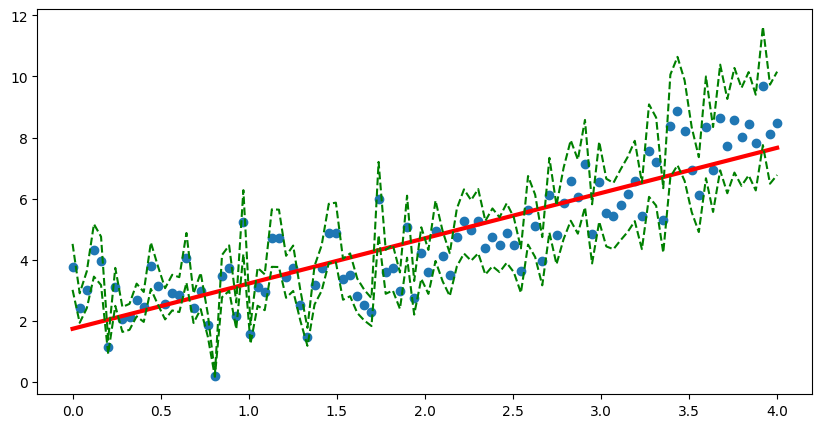

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', lw="3")
plt.plot(X, y + y * 0.2, color='green', ls="--")
plt.plot(X, y - y * 0.2, color='green', ls="--")
plt.show()


In [32]:
def custom_metric(y, y_pred):
    return np.sum((y_pred < y + y * 0.2) & (y_pred > y - y * 0.2)) / y.size

custom_metric(y, y_pred)

0.63

In [33]:
custom_score = metrics.make_scorer(custom_metric, greater_is_better=True)

In [34]:
cross_val_score(model, X, y, cv=3, scoring=custom_score)

array([0.08823529, 0.42424242, 0.3030303 ])

In [35]:
model = SVR(kernel='rbf', degree=3)
params = {'gamma': np.arange(0.1, 1, 0.5)}

grid = GridSearchCV(model, params, cv=3, scoring=custom_score)

grid.fit(X, y)

GridSearchCV(cv=3, estimator=SVR(), param_grid={'gamma': array([0.1, 0.6])},
             scoring=make_scorer(custom_metric))

In [36]:
best_model = grid.best_estimator_

In [38]:
y_pred = best_model.predict(X)

In [39]:
custom_metric(y, y_pred)

0.65

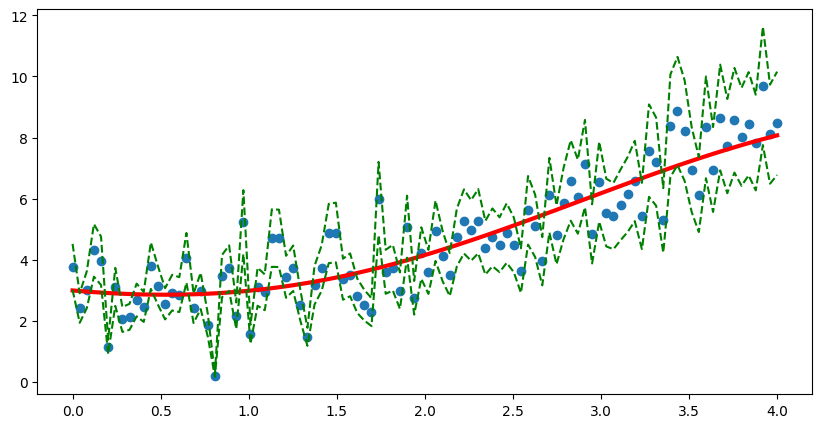

In [40]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', lw="3")
plt.plot(X, y + y * 0.2, color='green', ls="--")
plt.plot(X, y - y * 0.2, color='green', ls="--")
plt.show()